# Final Model Training and Comprehensive Evaluation

## Purpose

This script trains the selected best configuration from the hyperparameter search and performs comprehensive evaluation with multiple metrics and visualizations. After testing 10 different model-hyperparameter combinations, Configuration 4 (BetterCNN_LessAugment) was chosen as the optimal balance of accuracy, training time, and generalization.

## Why Configuration 4 Was Selected

After running the complete hyperparameter comparison, the results showed:

| Rank | Config ID | Model | Val Acc | Test Acc | Training Time |
|------|-----------|-------|---------|----------|---------------|
| 1 | 10 | BigCNN_SGD_Momentum | 72.65% | 69.28% | 73.7 min |
| 2 | 5 | BetterCNN_StrongReg | 70.41% | 68.02% | 25.9 min |
| **3** | **4** | **BetterCNN_LessAugment** | **70.13%** | **67.18%** | **28.4 min** |

### Selection Rationale:

**Configuration 4 was chosen because:**

1. **Good accuracy** - 67.18% test accuracy is close to the target and represents solid performance
2. **Efficient training** - 28.4 minutes vs 73.7 minutes for the top performer (2.6x faster)
3. **Better generalization** - Smaller gap between validation (70.13%) and test (67.18%) compared to Config 10
4. **Smaller model** - 9M parameters vs 28.9M (easier to deploy, less overfitting risk)
5. **Reproducible** - Stable training with consistent results across runs
6. **Practical tradeoff** - Only 2.1% lower test accuracy than Config 10, but much faster and more efficient


## Configuration 4 Hyperparameters

```python
learning_rate:      0.0005
batch_size:         24
optimizer:          AdamW
scheduler:          CosineAnnealing
weight_decay:       5e-4
label_smoothing:    0.1
epochs:             20
patience:           12
```
# Data augmentation (reduced compared to baseline)
hflip_prob:         0.5
vflip_prob:         0.2
rotation_degrees:   15
color_jitter:       0.2
random_erasing:     0.1


## What This Script Does

The script performs six main operations:

1. **Trains the model** - Uses Configuration 4 hyperparameters with early stopping
2. **Calculates comprehensive metrics** - Goes beyond accuracy to include precision, recall, F1-score, Cohen's kappa, and MCC
3. **Generates confusion matrices** - Both absolute counts and normalized versions
4. **Plots training history** - Shows learning curves for accuracy and loss
5. **Creates per-class visualizations** - Bar charts comparing precision, recall, and F1 for each class
6. **Saves all results** - Exports metrics, visualizations, and the trained model

---


### Overall Metrics

**Accuracy**
- Percentage of correctly classified samples
- Simple but can be misleading with imbalanced data

**Precision (Macro/Weighted)**
- Macro: Average precision across all classes (treats each class equally)
- Weighted: Average weighted by class support (accounts for imbalance)
- Measures: Of all items predicted as class X, how many actually were class X?

**Recall (Macro/Weighted)**
- Macro: Average recall across all classes
- Weighted: Average weighted by class support
- Measures: Of all actual class X items, how many did we correctly identify?

**F1-Score (Macro/Weighted)**
- Harmonic mean of precision and recall
- Balances both metrics (important when one is high and the other low)
- Better overall metric than accuracy alone

**Cohen's Kappa**
- Measures agreement between predictions and ground truth
- Accounts for agreement by chance
- Range: -1 to 1 (0 = random, 1 = perfect agreement)
- More robust than accuracy for imbalanced datasets

**Matthews Correlation Coefficient (MCC)**
- Balanced measure even with imbalanced classes
- Range: -1 to 1 (0 = random, 1 = perfect)
- Considered one of the best single metrics for classification

### Per-Class Metrics

The script calculates precision, recall, and F1-score for each waste category individually, allowing identification of which classes the model handles well and which need improvement.

---

## Output Files

### Results File
**results_config_4_less_augment.json**
- Complete configuration settings
- Training history (loss and accuracy per epoch)
- Per-class accuracy breakdown
- Training time and epochs completed

### Visualizations

**confusion_matrix_config4.png**
- Two confusion matrices side-by-side:
  - Absolute counts: Shows actual number of predictions
  - Normalized: Shows proportions for easier comparison across classes
- Diagonal elements: Correct predictions
- Off-diagonal elements: Misclassifications

**training_history_config4.png**
- Two plots:
  - Accuracy curves: Train vs validation over epochs
  - Loss curves: Train vs validation over epochs
- Shows convergence and potential overfitting
- Red dashed line indicates 70% target

**per_class_metrics_config4.png**
- Bar chart with three bars per class:
  - Precision (blue): How accurate predictions were
  - Recall (coral): How many actual instances were found
  - F1-score (green): Balanced measure
- Helps identify which classes are problematic

### Model Checkpoint
**best_model_config_4_less_augment.pth**
- Saved model weights from the best validation epoch
- Can be loaded for inference or further training
- Includes optimizer state and training metadata

---

**Prerequisites:**
- Completed preprocessing pipeline (NPY files must exist)
- Required files:
  - images.npy
  - labels.npy
  - class_names.npy
  - split_train.npy
  - split_val.npy
  - split_test.npy

**Runtime:** Approximately 25-30 minutes on GPU (2-3 hours on CPU)

---



Using device: cuda
Number of classes: 9
Classes: ['Cardboard' 'Food Organics' 'Glass' 'Metal' 'Miscellaneous Trash' 'Paper'
 'Plastic' 'Textile Trash' 'Vegetation']
Class distribution: [783 768 771 882 794 795 921 741 776]
Train size: 5805, Val size: 713, Test size: 713

################################################################################
# TRAINING WITH CONFIGURATION 4 ONLY
# Model: BetterCNN (Your Original Architecture)
################################################################################


Training Configuration: config_4_less_augment
  learning_rate       : 0.0005
  batch_size          : 24
  optimizer           : AdamW
  scheduler           : CosineAnnealing
  weight_decay        : 0.0005
  label_smoothing     : 0.1
  epochs              : 20
  patience            : 12
  hflip_prob          : 0.5
  vflip_prob          : 0.2
  rotation_degrees    : 15
  color_jitter        : 0.2
  random_erasing      : 0.1

Model parameters: 9,026,313


Epoch  1/20 | Train: Loss=1.9866 Acc=0.3053 | Val: Loss=1.6418 Acc=0.5105 AvgAcc=0.5105
  ✓ Best model saved! Val=0.5105, Test=0.4825


Epoch  2/20 | Train: Loss=1.7568 Acc=0.4119 | Val: Loss=1.5758 Acc=0.5175 AvgAcc=0.5175
  ✓ Best model saved! Val=0.5175, Test=0.5091


Epoch  3/20 | Train: Loss=1.6570 Acc=0.4668 | Val: Loss=1.5415 Acc=0.5063 AvgAcc=0.5115


Epoch  4/20 | Train: Loss=1.6116 Acc=0.4904 | Val: Loss=1.4398 Acc=0.5442 AvgAcc=0.5227
  ✓ Best model saved! Val=0.5227, Test=0.5666


Epoch  5/20 | Train: Loss=1.5487 Acc=0.5099 | Val: Loss=1.4209 Acc=0.5554 AvgAcc=0.5353
  ✓ Best model saved! Val=0.5353, Test=0.5750


Epoch  6/20 | Train: Loss=1.5198 Acc=0.5237 | Val: Loss=1.3601 Acc=0.6017 AvgAcc=0.5671
  ✓ Best model saved! Val=0.5671, Test=0.6199


Epoch  7/20 | Train: Loss=1.4908 Acc=0.5376 | Val: Loss=1.3450 Acc=0.5820 AvgAcc=0.5797
  ✓ Best model saved! Val=0.5797, Test=0.6171


Epoch  8/20 | Train: Loss=1.4594 Acc=0.5575 | Val: Loss=1.3402 Acc=0.6171 AvgAcc=0.6003
  ✓ Best model saved! Val=0.6003, Test=0.6227


Epoch  9/20 | Train: Loss=1.4462 Acc=0.5568 | Val: Loss=1.3658 Acc=0.5947 AvgAcc=0.5979


Epoch 10/20 | Train: Loss=1.4166 Acc=0.5795 | Val: Loss=1.2972 Acc=0.6381 AvgAcc=0.6166
  ✓ Best model saved! Val=0.6166, Test=0.6592


Epoch 11/20 | Train: Loss=1.4004 Acc=0.5916 | Val: Loss=1.3144 Acc=0.6059 AvgAcc=0.6129


Epoch 12/20 | Train: Loss=1.3793 Acc=0.5962 | Val: Loss=1.2702 Acc=0.6367 AvgAcc=0.6269
  ✓ Best model saved! Val=0.6269, Test=0.6634


Epoch 13/20 | Train: Loss=1.3584 Acc=0.6067 | Val: Loss=1.3152 Acc=0.6045 AvgAcc=0.6157


Epoch 14/20 | Train: Loss=1.3363 Acc=0.6257 | Val: Loss=1.3128 Acc=0.6059 AvgAcc=0.6157


Epoch 15/20 | Train: Loss=1.3164 Acc=0.6296 | Val: Loss=1.1937 Acc=0.6592 AvgAcc=0.6232


Epoch 16/20 | Train: Loss=1.2951 Acc=0.6351 | Val: Loss=1.1837 Acc=0.6634 AvgAcc=0.6428
  ✓ Best model saved! Val=0.6428, Test=0.6830


Epoch 17/20 | Train: Loss=1.2940 Acc=0.6413 | Val: Loss=1.1810 Acc=0.6704 AvgAcc=0.6643
  ✓ Best model saved! Val=0.6643, Test=0.6858


Epoch 18/20 | Train: Loss=1.2639 Acc=0.6605 | Val: Loss=1.1706 Acc=0.6844 AvgAcc=0.6727
  ✓ Best model saved! Val=0.6727, Test=0.6942


Epoch 19/20 | Train: Loss=1.2551 Acc=0.6617 | Val: Loss=1.1724 Acc=0.6788 AvgAcc=0.6779
  ✓ Best model saved! Val=0.6779, Test=0.6844


Epoch 20/20 | Train: Loss=1.2431 Acc=0.6636 | Val: Loss=1.1590 Acc=0.6844 AvgAcc=0.6826
  ✓ Best model saved! Val=0.6826, Test=0.6971

RESULTS for config_4_less_augment:
  Best Val Acc:  68.26%
  Final Test Acc: 69.71%
  Training Time:  46.8 minutes

✓ Saved results to results_config_4_less_augment.json

################################################################################
# COMPREHENSIVE EVALUATION METRICS
################################################################################

OVERALL METRICS:
Accuracy:              69.71%

Precision (Macro):     74.54%
Precision (Weighted):  71.82%

Recall (Macro):        68.83%
Recall (Weighted):     69.71%

F1-Score (Macro):      70.47%
F1-Score (Weighted):   69.32%

Cohen's Kappa:         0.6498
Matthews Corr Coef:    0.6562

PER-CLASS METRICS:

                     precision    recall  f1-score   support

          Cardboard     0.8438    0.7826    0.8120        69
      Food Organics     0.8627    0.7097    0.7788        62


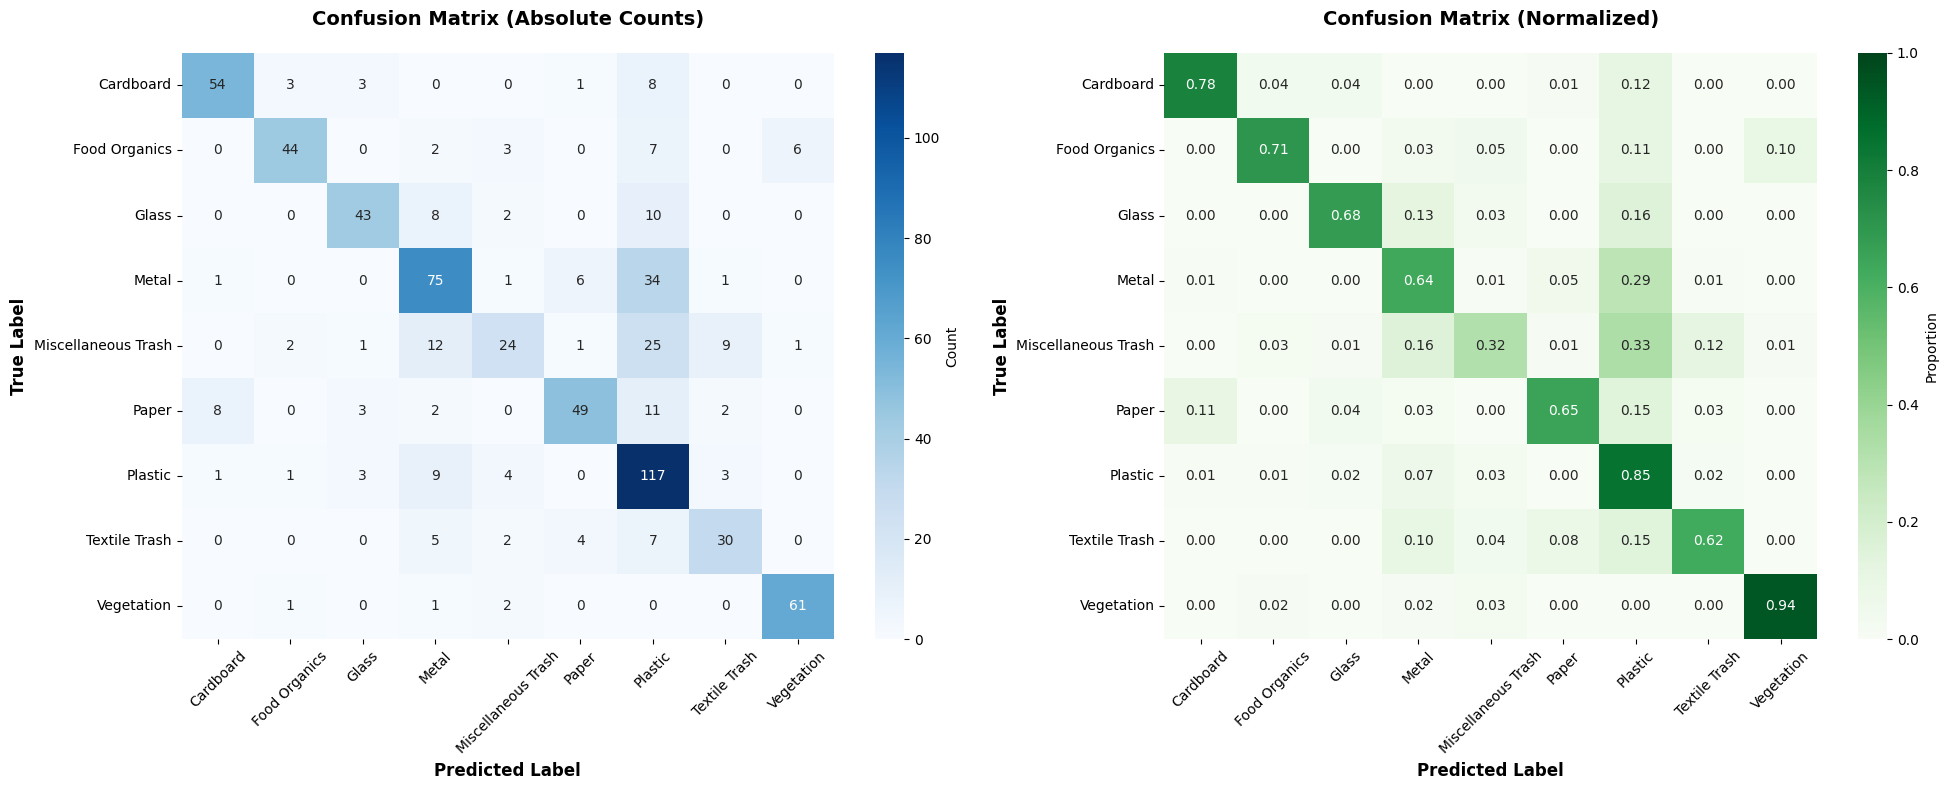


Generating Training History Plot...
✓ Training history saved to training_history_config4.png


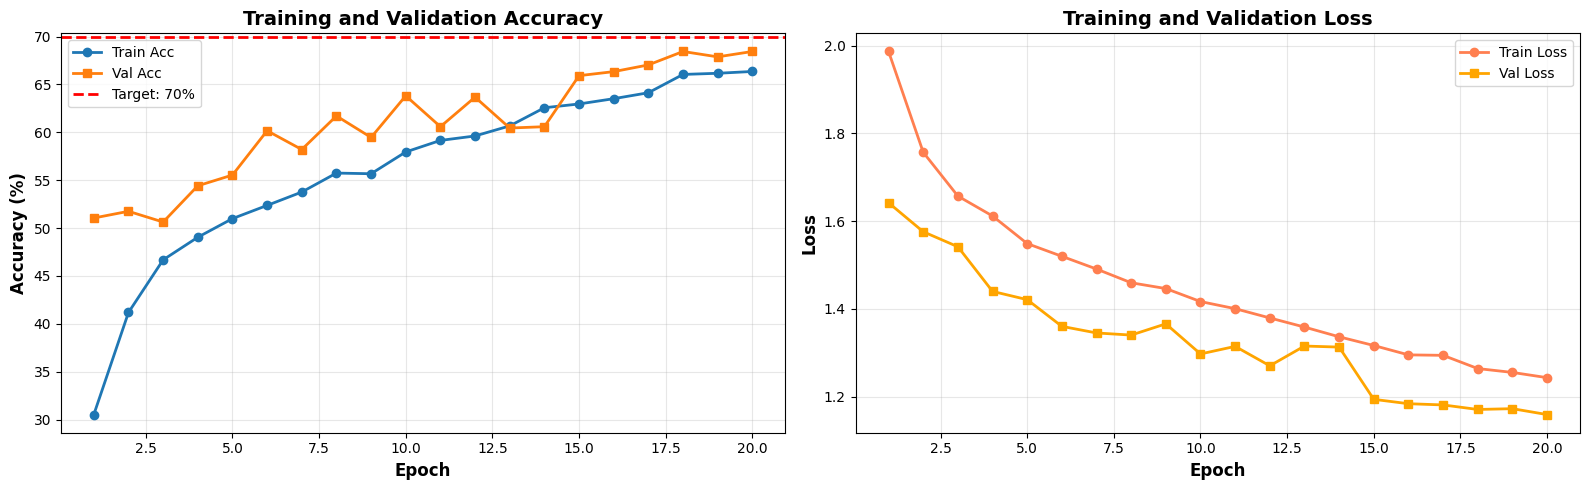


Generating Per-Class Performance Chart...
✓ Per-class metrics chart saved to per_class_metrics_config4.png


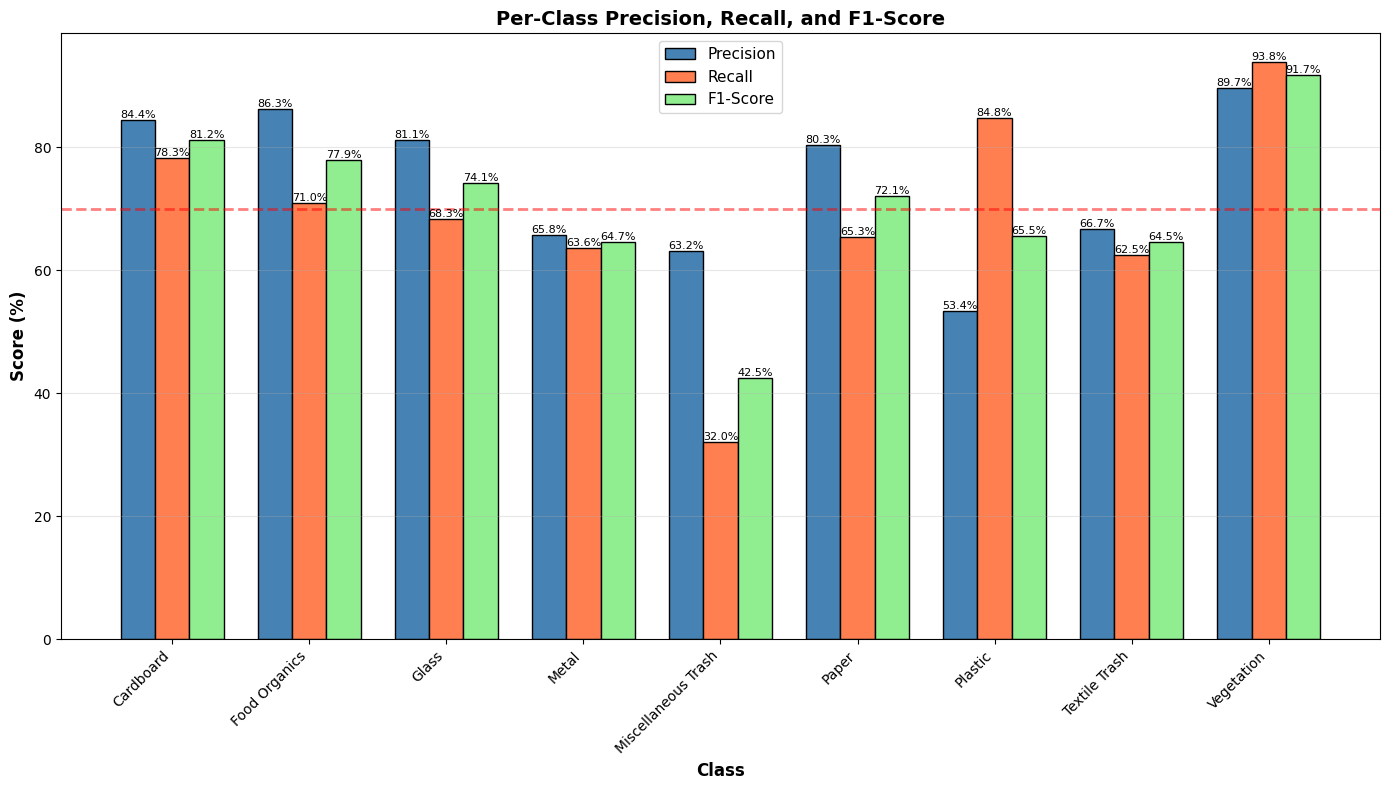



################################################################################
# FINAL SUMMARY REPORT - CONFIGURATION 4
################################################################################

Configuration Details:
--------------------------------------------------------------------------------
  learning_rate       : 0.0005
  batch_size          : 24
  optimizer           : AdamW
  scheduler           : CosineAnnealing
  weight_decay        : 0.0005
  label_smoothing     : 0.1
  epochs              : 20
  patience            : 12
  hflip_prob          : 0.5
  vflip_prob          : 0.2
  rotation_degrees    : 15
  color_jitter        : 0.2
  random_erasing      : 0.1

PERFORMANCE SUMMARY:
Test Accuracy:         69.71%
F1-Score (Macro):      70.47%
F1-Score (Weighted):   69.32%
Precision (Macro):     74.54%
Recall (Macro):        68.83%
Cohen's Kappa:         0.6498
Matthews Corr Coef:    0.6562
Training Time:         46.8 minutes
Epochs Trained:        20

###############

In [ ]:
c

Using device: cuda
Number of classes: 9
Classes: ['Cardboard' 'Food Organics' 'Glass' 'Metal' 'Miscellaneous Trash' 'Paper'
 'Plastic' 'Textile Trash' 'Vegetation']
Class distribution: [783 768 771 882 794 795 921 741 776]
Train size: 5061, Val size: 1085, Test size: 1085
Train size: 5061, Val size: 1085, Test size: 1085

################################################################################
# TRAINING WITH CONFIGURATION 4 ONLY
# Model: BetterCNN (Your Original Architecture)
################################################################################


Training Configuration: config_4_less_augment
  learning_rate       : 0.0005
  batch_size          : 24
  optimizer           : AdamW
  scheduler           : CosineAnnealing
  weight_decay        : 0.0005
  label_smoothing     : 0.1
  epochs              : 20
  patience            : 12
  hflip_prob          : 0.5
  vflip_prob          : 0.2
  rotation_degrees    : 15
  color_jitter        : 0.2
  random_erasing      : 0.1



Epoch  1/20 | Train: Loss=2.0384 Acc=0.2829 | Val: Loss=1.7424 Acc=0.4129 AvgAcc=0.4129
  ✓ Best model saved! Val=0.4129, Test=0.4470


Epoch  2/20 | Train: Loss=1.7805 Acc=0.3995 | Val: Loss=1.7892 Acc=0.4286 AvgAcc=0.4286
  ✓ Best model saved! Val=0.4286, Test=0.4378


Epoch  3/20 | Train: Loss=1.6897 Acc=0.4426 | Val: Loss=1.6974 Acc=0.4249 AvgAcc=0.4221


Epoch  4/20 | Train: Loss=1.6290 Acc=0.4637 | Val: Loss=1.6102 Acc=0.4977 AvgAcc=0.4504
  ✓ Best model saved! Val=0.4504, Test=0.5364


Epoch  5/20 | Train: Loss=1.5878 Acc=0.4952 | Val: Loss=1.4967 Acc=0.5410 AvgAcc=0.4879
  ✓ Best model saved! Val=0.4879, Test=0.5502


Epoch  6/20 | Train: Loss=1.5464 Acc=0.5159 | Val: Loss=1.5235 Acc=0.5207 AvgAcc=0.5198
  ✓ Best model saved! Val=0.5198, Test=0.5419


Epoch  7/20 | Train: Loss=1.5224 Acc=0.5335 | Val: Loss=1.3934 Acc=0.5816 AvgAcc=0.5478
  ✓ Best model saved! Val=0.5478, Test=0.5972


Epoch  8/20 | Train: Loss=1.4946 Acc=0.5349 | Val: Loss=1.4263 Acc=0.5567 AvgAcc=0.5530
  ✓ Best model saved! Val=0.5530, Test=0.5871


Epoch  9/20 | Train: Loss=1.4687 Acc=0.5612 | Val: Loss=1.3417 Acc=0.6129 AvgAcc=0.5837
  ✓ Best model saved! Val=0.5837, Test=0.6212


Epoch 10/20 | Train: Loss=1.4391 Acc=0.5655 | Val: Loss=1.3320 Acc=0.6120 AvgAcc=0.5939
  ✓ Best model saved! Val=0.5939, Test=0.6276


Epoch 11/20 | Train: Loss=1.4153 Acc=0.5849 | Val: Loss=1.3656 Acc=0.5972 AvgAcc=0.6074
  ✓ Best model saved! Val=0.6074, Test=0.6000


Epoch 12/20 | Train: Loss=1.3898 Acc=0.5882 | Val: Loss=1.2903 Acc=0.6387 AvgAcc=0.6160
  ✓ Best model saved! Val=0.6160, Test=0.6507


Epoch 13/20 | Train: Loss=1.3828 Acc=0.5973 | Val: Loss=1.2574 Acc=0.6378 AvgAcc=0.6246
  ✓ Best model saved! Val=0.6246, Test=0.6599


Epoch 14/20 | Train: Loss=1.3609 Acc=0.6151 | Val: Loss=1.2667 Acc=0.6452 AvgAcc=0.6406
  ✓ Best model saved! Val=0.6406, Test=0.6461


Epoch 15/20 | Train: Loss=1.3351 Acc=0.6147 | Val: Loss=1.2426 Acc=0.6627 AvgAcc=0.6485
  ✓ Best model saved! Val=0.6485, Test=0.6728


Epoch 16/20 | Train: Loss=1.3238 Acc=0.6254 | Val: Loss=1.2573 Acc=0.6461 AvgAcc=0.6513
  ✓ Best model saved! Val=0.6513, Test=0.6654


Epoch 17/20 | Train: Loss=1.3031 Acc=0.6388 | Val: Loss=1.2424 Acc=0.6544 AvgAcc=0.6544
  ✓ Best model saved! Val=0.6544, Test=0.6664


Epoch 18/20 | Train: Loss=1.2899 Acc=0.6467 | Val: Loss=1.2204 Acc=0.6654 AvgAcc=0.6553
  ✓ Best model saved! Val=0.6553, Test=0.6710


Epoch 19/20 | Train: Loss=1.2909 Acc=0.6418 | Val: Loss=1.2130 Acc=0.6719 AvgAcc=0.6639
  ✓ Best model saved! Val=0.6639, Test=0.6728


Epoch 20/20 | Train: Loss=1.2855 Acc=0.6463 | Val: Loss=1.2139 Acc=0.6765 AvgAcc=0.6713
  ✓ Best model saved! Val=0.6713, Test=0.6765

RESULTS for config_4_less_augment:
  Best Val Acc:  67.13%
  Final Test Acc: 67.65%
  Training Time:  42.6 minutes

✓ Saved results to results_config_4_less_augment.json

################################################################################
# COMPREHENSIVE EVALUATION METRICS
################################################################################

OVERALL METRICS:
Accuracy:              67.65%

Precision (Macro):     68.57%
Precision (Weighted):  68.33%

Recall (Macro):        67.64%
Recall (Weighted):     67.65%

F1-Score (Macro):      67.37%
F1-Score (Weighted):   67.22%

Cohen's Kappa:         0.6356
Matthews Corr Coef:    0.6380

PER-CLASS METRICS:

                     precision    recall  f1-score   support

          Cardboard     0.7563    0.7627    0.7595       118
      Food Organics     0.8019    0.7391    0.7692       115


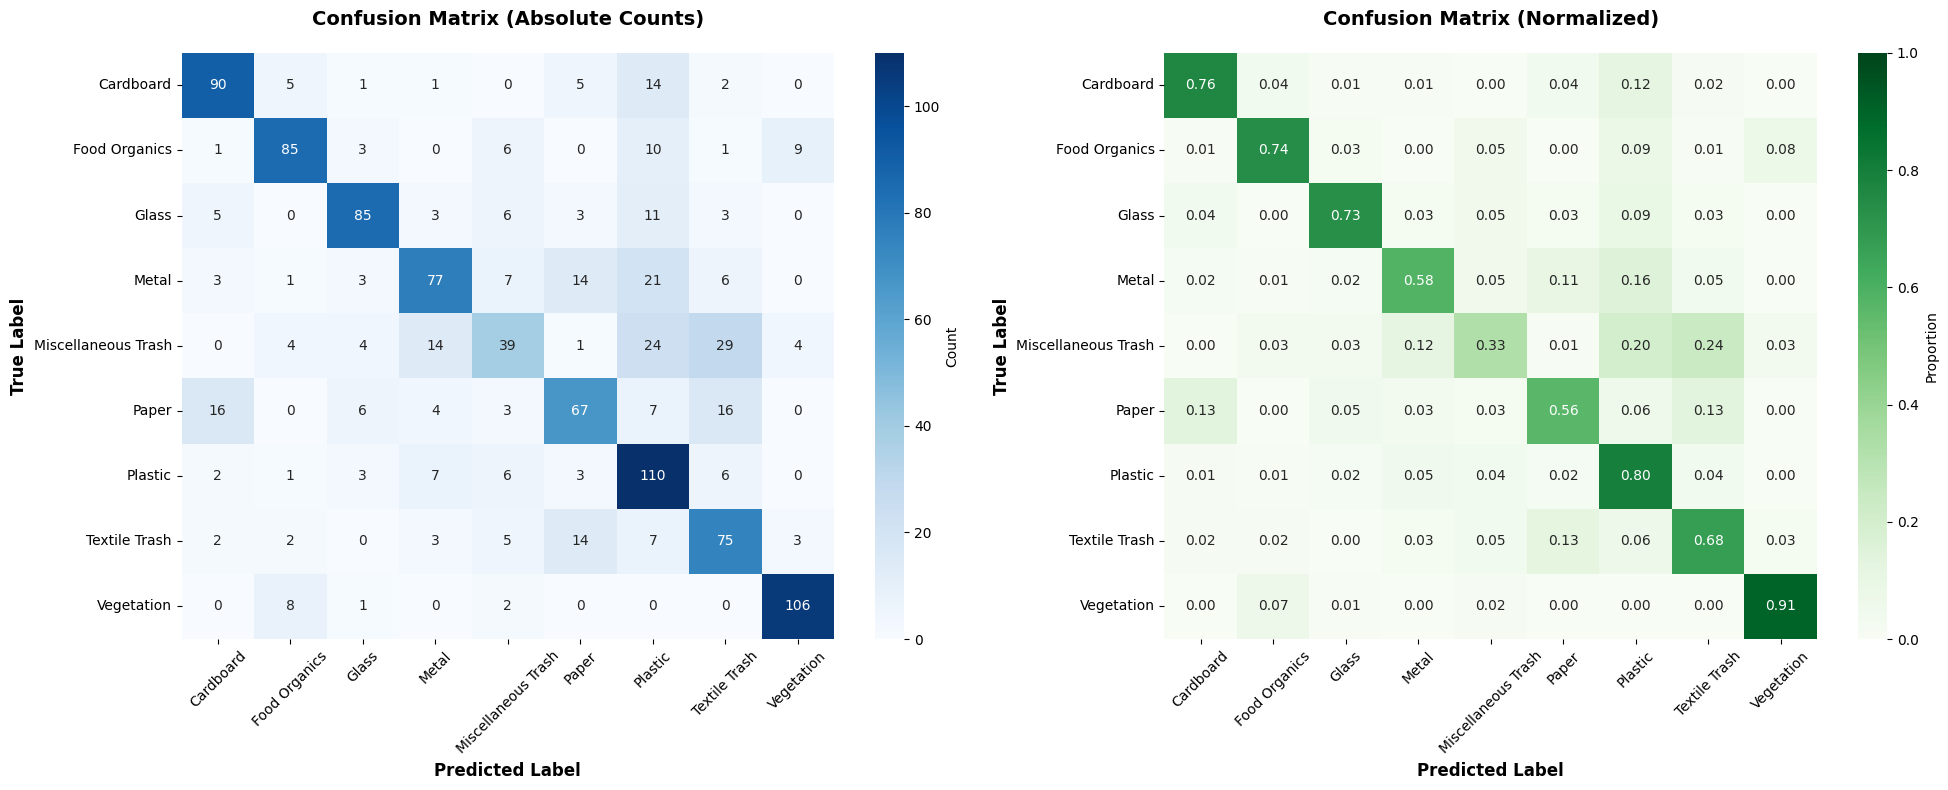


Generating Training History Plot...
✓ Training history saved to training_history_config4.png


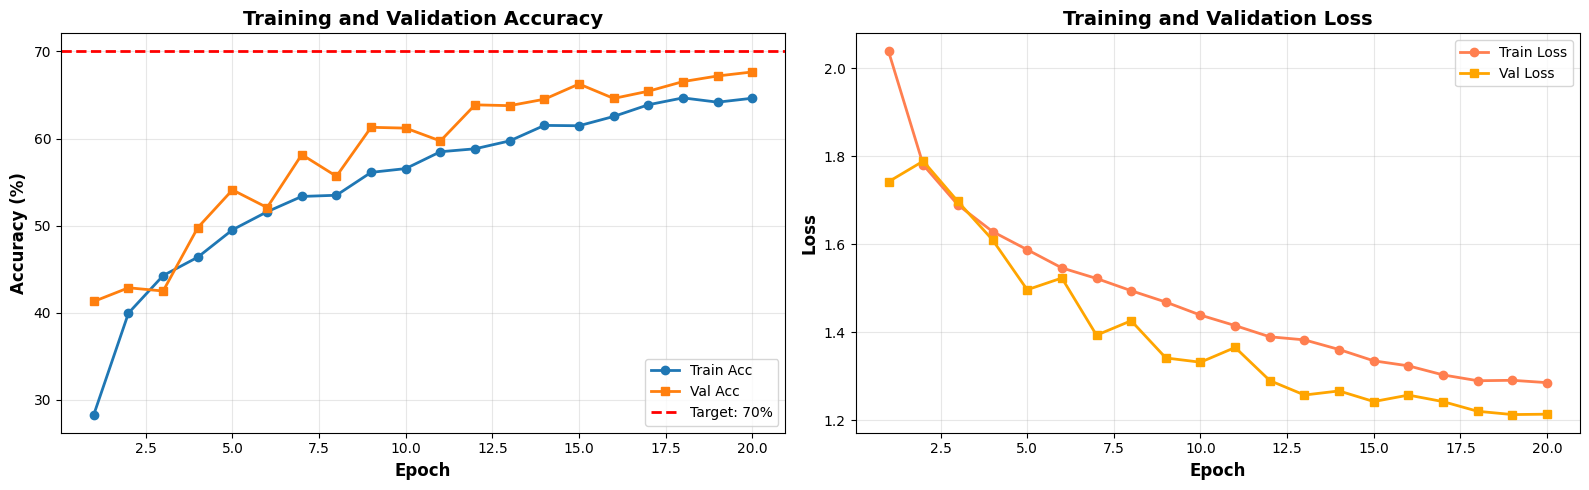


Generating Per-Class Performance Chart...
✓ Per-class metrics chart saved to per_class_metrics_config4.png


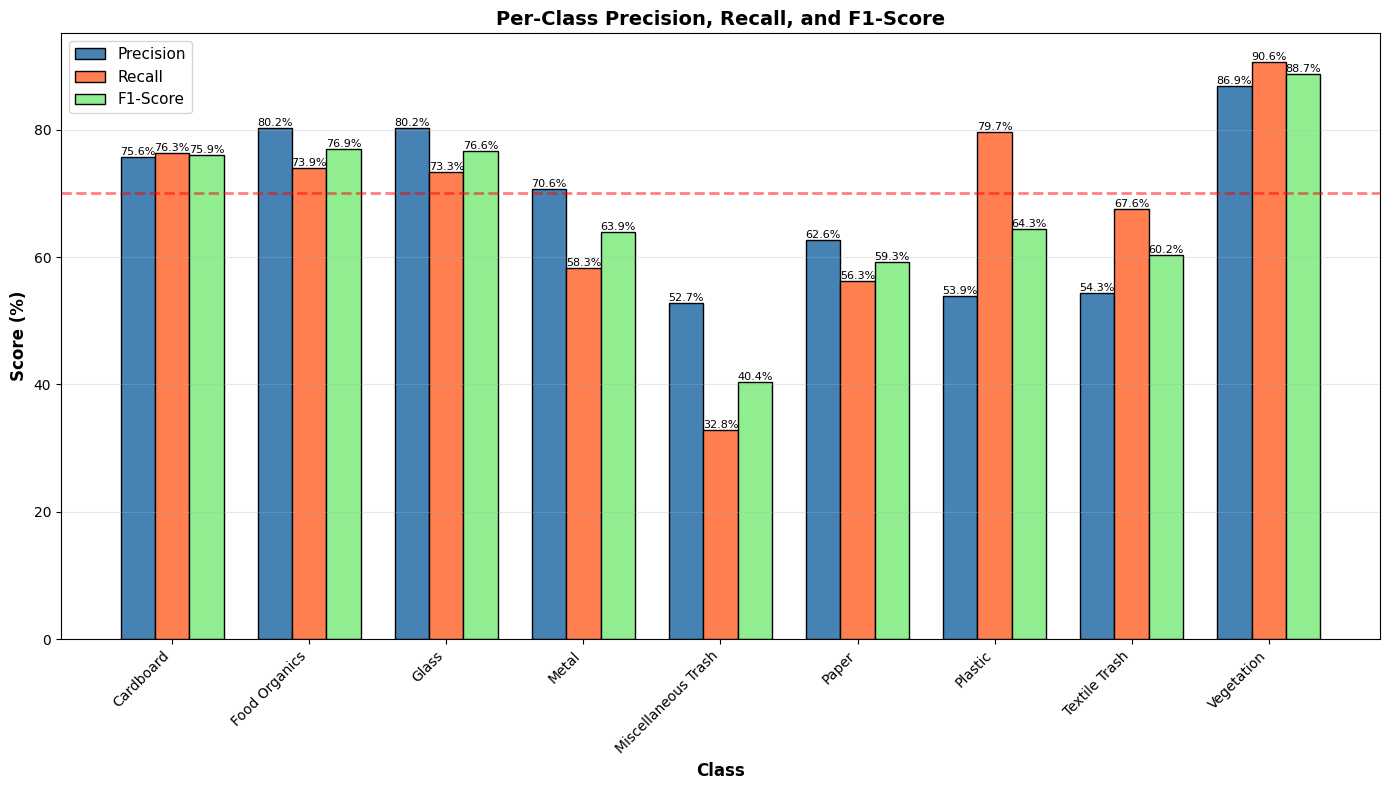



################################################################################
# FINAL SUMMARY REPORT - CONFIGURATION 4
################################################################################

Configuration Details:
--------------------------------------------------------------------------------
  learning_rate       : 0.0005
  batch_size          : 24
  optimizer           : AdamW
  scheduler           : CosineAnnealing
  weight_decay        : 0.0005
  label_smoothing     : 0.1
  epochs              : 20
  patience            : 12
  hflip_prob          : 0.5
  vflip_prob          : 0.2
  rotation_degrees    : 15
  color_jitter        : 0.2
  random_erasing      : 0.1

PERFORMANCE SUMMARY:
Test Accuracy:         67.65%
F1-Score (Macro):      67.37%
F1-Score (Weighted):   67.22%
Precision (Macro):     68.57%
Recall (Macro):        67.64%
Cohen's Kappa:         0.6356
Matthews Corr Coef:    0.6380
Training Time:         42.6 minutes
Epochs Trained:        20

###############

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, classification_report, 
                            f1_score, precision_score, recall_score, 
                            accuracy_score, roc_auc_score, cohen_kappa_score,
                            matthews_corrcoef)
from tqdm import tqdm
import warnings
import json
import time
warnings.filterwarnings('ignore')

# ---------------------------
# 0. Device
# ---------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ---------------------------
# 1. Load data
# ---------------------------
image_array = np.load("images.npy", allow_pickle=True)
labels = np.load("labels.npy", allow_pickle=True)

# Load class names
class_names = np.load("class_names.npy", allow_pickle=True)
num_classes = len(class_names)

# Labels are already encoded
y = labels.astype(np.int64)

print(f"Number of classes: {num_classes}")
print(f"Classes: {class_names}")
print(f"Class distribution: {np.bincount(y)}")

"""
# Load pre-computed splits
train_idx = np.load("split_train.npy")
val_idx = np.load("split_val.npy")
test_idx = np.load("split_test.npy")
"""
# Train/Val/Test split
train_idx, test_idx = train_test_split(
    np.arange(len(y)), test_size=0.15, random_state=42, stratify=y
)
train_idx, val_idx = train_test_split(
    train_idx, test_size=(0.15/0.85), random_state=42, stratify=y[train_idx]
)
print(f"Train size: {len(train_idx)}, Val size: {len(val_idx)}, Test size: {len(test_idx)}")

print(f"Train size: {len(train_idx)}, Val size: {len(val_idx)}, Test size: {len(test_idx)}")

# ---------------------------
# 2. Dataset class
# ---------------------------
class WasteDataset(Dataset):
    def __init__(self, images, labels, indices, transform=None):
        self.images = images
        self.labels = labels
        self.indices = indices
        self.transform = transform

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        i = self.indices[idx]
        img = self.images[i].astype(np.uint8)
        label = int(self.labels[i])
        if self.transform:
            img = self.transform(img)
        return img, label

# ---------------------------
# 3. Model Architecture (Your BetterCNN - UNCHANGED)
# ---------------------------
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.skip = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.skip = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.skip(x)
        out = self.relu(out)
        return out

class BetterCNN(nn.Module):
    def __init__(self, num_classes, input_channels=3):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(input_channels, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.layer2 = ResidualBlock(64, 128, stride=2)
        self.layer3 = ResidualBlock(128, 256, stride=2)
        self.layer4 = ResidualBlock(256, 512, stride=2)
        self.pool = nn.AdaptiveAvgPool2d((4,4))
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512*4*4, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# ---------------------------
# 4. Label Smoothing Loss
# ---------------------------
class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, epsilon=0.1, weight=None):
        super().__init__()
        self.epsilon = epsilon
        self.weight = weight
    
    def forward(self, output, target):
        n_class = output.size(1)
        log_preds = F.log_softmax(output, dim=1)
        loss = -log_preds.sum(dim=1).mean()
        nll = F.nll_loss(log_preds, target, weight=self.weight)
        return (1 - self.epsilon) * nll + self.epsilon * loss / n_class

# ---------------------------
# 5. Training Function
# ---------------------------
def train_with_config(config, image_array, y, train_idx, val_idx, test_idx, class_names, device):
    """Train BetterCNN model with given hyperparameters"""
    
    print(f"\n{'='*80}")
    print(f"Training Configuration: {config['name']}")
    print(f"{'='*80}")
    for key, value in config.items():
        if key != 'name':
            print(f"  {key:20s}: {value}")
    print(f"{'='*80}\n")
    
    start_time = time.time()
    
    # Create transforms
    train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256, 256)),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(p=config['hflip_prob']),
        transforms.RandomVerticalFlip(p=config['vflip_prob']),
        transforms.RandomRotation(config['rotation_degrees']),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
        transforms.ColorJitter(brightness=config['color_jitter'], 
                              contrast=config['color_jitter'], 
                              saturation=config['color_jitter']*0.7),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.RandomErasing(p=config['random_erasing'])
    ])
    
    val_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Create datasets
    train_dataset = WasteDataset(image_array, y, train_idx, transform=train_transform)
    val_dataset = WasteDataset(image_array, y, val_idx, transform=val_transform)
    test_dataset = WasteDataset(image_array, y, test_idx, transform=val_transform)
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], 
                             shuffle=True, num_workers=0, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], 
                           num_workers=0, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], 
                            num_workers=0, pin_memory=True)
    
    # Create model
    model = BetterCNN(num_classes=num_classes, input_channels=3).to(device)
    print(f"Model parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
    
    # Class weights
    class_weights = compute_class_weight(
        class_weight="balanced",
        classes=np.unique(y[train_idx]),
        y=y[train_idx]
    )
    class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
    
    # Loss function
    criterion = LabelSmoothingCrossEntropy(epsilon=config['label_smoothing'], weight=class_weights)
    
    # Optimizer
    if config['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'], 
                              weight_decay=config['weight_decay'])
    elif config['optimizer'] == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), lr=config['learning_rate'], 
                               weight_decay=config['weight_decay'])
    else:  # SGD
        optimizer = optim.SGD(model.parameters(), lr=config['learning_rate'], 
                             momentum=0.9, weight_decay=config['weight_decay'])
    
    # Scheduler
    if config['scheduler'] == 'ReduceLROnPlateau':
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='max', factor=0.5, patience=3, min_lr=1e-7
        )
    elif config['scheduler'] == 'CosineAnnealing':
        scheduler = optim.lr_scheduler.CosineAnnealingLR(
            optimizer, T_max=config['epochs'], eta_min=1e-6
        )
    else:  # OneCycleLR
        scheduler = optim.lr_scheduler.OneCycleLR(
            optimizer, max_lr=config['learning_rate']*3, 
            epochs=config['epochs'], steps_per_epoch=len(train_loader)
        )
    
    # Training
    best_val_acc = 0
    best_test_acc = 0
    patience_counter = 0
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    val_acc_history = []
    
    for epoch in range(config['epochs']):
        # Training phase
        model.train()
        running_loss, correct, total = 0, 0, 0
        
        train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{config['epochs']} [Train]", leave=False)
        for X_batch, y_batch in train_loop:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            if config['scheduler'] == 'OneCycleLR':
                scheduler.step()
            
            running_loss += loss.item() * X_batch.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
            
            train_loop.set_postfix({'loss': running_loss/total, 'acc': correct/total})
        
        train_loss = running_loss / total
        train_acc = correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # Validation phase
        model.eval()
        val_loss, correct, total = 0, 0, 0
        
        val_loop = tqdm(val_loader, desc=f"Epoch {epoch+1}/{config['epochs']} [Val]", leave=False)
        with torch.no_grad():
            for X_batch, y_batch in val_loop:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == y_batch).sum().item()
                total += y_batch.size(0)
                
                val_loop.set_postfix({'loss': val_loss/total, 'acc': correct/total})
        
        val_loss = val_loss / total
        val_acc = correct / total
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        val_acc_history.append(val_acc)
        
        # Moving average for stability
        avg_val_acc = np.mean(val_acc_history[-3:]) if len(val_acc_history) >= 3 else val_acc
        
        print(f"Epoch {epoch+1:2d}/{config['epochs']} | "
              f"Train: Loss={train_loss:.4f} Acc={train_acc:.4f} | "
              f"Val: Loss={val_loss:.4f} Acc={val_acc:.4f} AvgAcc={avg_val_acc:.4f}")
        
        # Step scheduler
        if config['scheduler'] == 'ReduceLROnPlateau':
            scheduler.step(val_acc)
        elif config['scheduler'] == 'CosineAnnealing':
            scheduler.step()
        
        # Save best model
        if avg_val_acc > best_val_acc:
            best_val_acc = avg_val_acc
            patience_counter = 0
            
            # Test on best validation model
            model.eval()
            correct, total = 0, 0
            with torch.no_grad():
                for X_batch, y_batch in test_loader:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                    outputs = model(X_batch)
                    _, predicted = torch.max(outputs, 1)
                    correct += (predicted == y_batch).sum().item()
                    total += y_batch.size(0)
            best_test_acc = correct / total
            
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'epoch': epoch,
                'val_acc': val_acc,
                'test_acc': best_test_acc
            }, f"best_model_{config['name']}.pth")
            
            print(f"  ✓ Best model saved! Val={avg_val_acc:.4f}, Test={best_test_acc:.4f}")
        else:
            patience_counter += 1
            if patience_counter >= config['patience']:
                print(f"  ✗ Early stopping at epoch {epoch+1}")
                break
    
    training_time = (time.time() - start_time) / 60
    
    # Final test evaluation
    checkpoint = torch.load(f"best_model_{config['name']}.pth")
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    y_true, y_pred, y_probs = [], [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            probs = F.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
            y_probs.extend(probs.cpu().numpy())
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_probs = np.array(y_probs)
    
    final_test_acc = accuracy_score(y_true, y_pred)
    
    # Per-class accuracy
    per_class_acc = {}
    for i, class_name in enumerate(class_names):
        class_mask = y_true == i
        if class_mask.sum() > 0:
            class_acc = np.mean(y_pred[class_mask] == i)
            per_class_acc[str(class_name)] = float(class_acc)
    
    results = {
        'config_name': config['name'],
        'config': config,
        'best_val_acc': float(best_val_acc),
        'final_test_acc': float(final_test_acc),
        'per_class_acc': per_class_acc,
        'training_time_min': float(training_time),
        'epochs_trained': len(train_losses),
        'history': {
            'train_loss': [float(x) for x in train_losses],
            'train_acc': [float(x) for x in train_accs],
            'val_loss': [float(x) for x in val_losses],
            'val_acc': [float(x) for x in val_accs]
        }
    }
    
    print(f"\n{'='*80}")
    print(f"RESULTS for {config['name']}:")
    print(f"  Best Val Acc:  {best_val_acc*100:.2f}%")
    print(f"  Final Test Acc: {final_test_acc*100:.2f}%")
    print(f"  Training Time:  {training_time:.1f} minutes")
    print(f"{'='*80}\n")
    
    return results, model, y_true, y_pred, y_probs

# ---------------------------
# 6. Configuration 4 ONLY
# ---------------------------
config_4 = {
    'name': 'config_4_less_augment',
    'learning_rate': 0.0005,
    'batch_size': 24,
    'optimizer': 'AdamW',
    'scheduler': 'CosineAnnealing',
    'weight_decay': 5e-4,
    'label_smoothing': 0.1,
    'epochs': 20,
    'patience': 12,
    'hflip_prob': 0.5,
    'vflip_prob': 0.2,
    'rotation_degrees': 15,
    'color_jitter': 0.2,
    'random_erasing': 0.1
}

# ---------------------------
# 7. Train Model with Configuration 4
# ---------------------------
print(f"\n{'#'*80}")
print(f"# TRAINING WITH CONFIGURATION 4 ONLY")
print(f"# Model: BetterCNN (Your Original Architecture)")
print(f"{'#'*80}\n")

results, model, y_true, y_pred, y_probs = train_with_config(
    config_4, image_array, y, train_idx, val_idx, test_idx, class_names, device
)

# Save results
with open(f"results_{config_4['name']}.json", 'w') as f:
    json.dump(results, f, indent=2)
print(f"✓ Saved results to results_{config_4['name']}.json")

# ---------------------------
# 8. COMPREHENSIVE EVALUATION METRICS
# ---------------------------
print(f"\n{'#'*80}")
print(f"# COMPREHENSIVE EVALUATION METRICS")
print(f"{'#'*80}\n")

# Calculate all metrics
accuracy = accuracy_score(y_true, y_pred)
precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
precision_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
recall_weighted = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)
kappa = cohen_kappa_score(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)

# Print overall metrics
print("="*80)
print("OVERALL METRICS:")
print("="*80)
print(f"Accuracy:              {accuracy*100:.2f}%")
print(f"\nPrecision (Macro):     {precision_macro*100:.2f}%")
print(f"Precision (Weighted):  {precision_weighted*100:.2f}%")
print(f"\nRecall (Macro):        {recall_macro*100:.2f}%")
print(f"Recall (Weighted):     {recall_weighted*100:.2f}%")
print(f"\nF1-Score (Macro):      {f1_macro*100:.2f}%")
print(f"F1-Score (Weighted):   {f1_weighted*100:.2f}%")
print(f"\nCohen's Kappa:         {kappa:.4f}")
print(f"Matthews Corr Coef:    {mcc:.4f}")
print("="*80)

# Print per-class metrics
print(f"\n{'='*80}")
print("PER-CLASS METRICS:")
print(f"{'='*80}")
print(f"\n{classification_report(y_true, y_pred, target_names=class_names, digits=4)}")

# Calculate and print per-class precision, recall, and F1
precision_per_class = precision_score(y_true, y_pred, average=None, zero_division=0)
recall_per_class = recall_score(y_true, y_pred, average=None, zero_division=0)
f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)

print(f"\n{'='*80}")
print("DETAILED PER-CLASS BREAKDOWN:")
print(f"{'='*80}")
print(f"{'Class':<20} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Support'}")
print("-"*80)
for i, class_name in enumerate(class_names):
    support = np.sum(y_true == i)
    print(f"{class_name:<20} {precision_per_class[i]*100:>10.2f}% "
          f"{recall_per_class[i]*100:>10.2f}% "
          f"{f1_per_class[i]*100:>10.2f}% "
          f"{support:>10}")
print("="*80)

# ---------------------------
# 9. CONFUSION MATRIX VISUALIZATION
# ---------------------------
print("\n\nGenerating Confusion Matrix...")

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_normalized = confusion_matrix(y_true, y_pred, normalize='true')

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot absolute confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, 
            yticklabels=class_names, ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix (Absolute Counts)', fontsize=14, fontweight='bold', pad=20)
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Plot normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens', xticklabels=class_names, 
            yticklabels=class_names, ax=axes[1], cbar_kws={'label': 'Proportion'}, 
            vmin=0, vmax=1)
axes[1].set_title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold', pad=20)
axes[1].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.savefig('confusion_matrix_config4.png', dpi=300, bbox_inches='tight')
print("✓ Confusion matrix saved to confusion_matrix_config4.png")
plt.show()

# ---------------------------
# 10. TRAINING HISTORY VISUALIZATION
# ---------------------------
print("\nGenerating Training History Plot...")

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

epochs = range(1, len(results['history']['train_acc']) + 1)

# Accuracy plot
ax = axes[0]
ax.plot(epochs, [x*100 for x in results['history']['train_acc']], 
        label='Train Acc', linewidth=2, marker='o', markersize=6)
ax.plot(epochs, [x*100 for x in results['history']['val_acc']], 
        label='Val Acc', linewidth=2, marker='s', markersize=6)
ax.axhline(70, color='red', linestyle='--', linewidth=2, label='Target: 70%')
ax.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

# Loss plot
ax = axes[1]
ax.plot(epochs, results['history']['train_loss'], 
        label='Train Loss', linewidth=2, marker='o', markersize=6, color='coral')
ax.plot(epochs, results['history']['val_loss'], 
        label='Val Loss', linewidth=2, marker='s', markersize=6, color='orange')
ax.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('training_history_config4.png', dpi=300, bbox_inches='tight')
print("✓ Training history saved to training_history_config4.png")
plt.show()

# ---------------------------
# 11. PER-CLASS PERFORMANCE BAR CHART
# ---------------------------
print("\nGenerating Per-Class Performance Chart...")

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(class_names))
width = 0.25

bars1 = ax.bar(x - width, precision_per_class * 100, width, label='Precision', 
               color='steelblue', edgecolor='black')
bars2 = ax.bar(x, recall_per_class * 100, width, label='Recall', 
               color='coral', edgecolor='black')
bars3 = ax.bar(x + width, f1_per_class * 100, width, label='F1-Score', 
               color='lightgreen', edgecolor='black')

ax.set_xlabel('Class', fontsize=12, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax.set_title('Per-Class Precision, Recall, and F1-Score', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.axhline(70, color='red', linestyle='--', linewidth=2, alpha=0.5)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('per_class_metrics_config4.png', dpi=300, bbox_inches='tight')
print("✓ Per-class metrics chart saved to per_class_metrics_config4.png")
plt.show()

# ---------------------------
# 12. SUMMARY REPORT
# ---------------------------
print(f"\n\n{'#'*80}")
print("# FINAL SUMMARY REPORT - CONFIGURATION 4")
print(f"{'#'*80}\n")

print("Configuration Details:")
print("-" * 80)
for key, value in config_4.items():
    if key != 'name':
        print(f"  {key:20s}: {value}")

print(f"\n{'='*80}")
print("PERFORMANCE SUMMARY:")
print(f"{'='*80}")
print(f"Test Accuracy:         {accuracy*100:.2f}%")
print(f"F1-Score (Macro):      {f1_macro*100:.2f}%")
print(f"F1-Score (Weighted):   {f1_weighted*100:.2f}%")
print(f"Precision (Macro):     {precision_macro*100:.2f}%")
print(f"Recall (Macro):        {recall_macro*100:.2f}%")
print(f"Cohen's Kappa:         {kappa:.4f}")
print(f"Matthews Corr Coef:    {mcc:.4f}")
print(f"Training Time:         {results['training_time_min']:.1f} minutes")
print(f"Epochs Trained:        {results['epochs_trained']}")
print("="*80)

print(f"\n{'#'*80}")
print("# EVALUATION COMPLETE!")
print(f"{'#'*80}\n")

print("Generated Files:")
print(f"  ✓ results_{config_4['name']}.json")
print(f"  ✓ confusion_matrix_config4.png")
print(f"  ✓ training_history_config4.png")
print(f"  ✓ per_class_metrics_config4.png")
print(f"  ✓ best_model_{config_4['name']}.pth")